## 学習モデル作成，学習

In [2]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 学習データとテストデータに分割

In [ ]:
race_x = pd.read_pickle("data/race_x.pkl").values
race_y = pd.read_pickle("data/race_y.pkl").values
len(race_y)

57768

In [ ]:
print(len(race_x[0]))
print(race_y[0])

29
1.0


In [ ]:
# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(race_x, race_y, train_size=0.7)

### 学習モデル作成(多層パーセプトロン，relu関数，クロスエントロピー誤差)

In [ ]:
def learningModel(dim_1, dim_2, dim_3, batch_size, epochs):
    n_in = len(race_x[0])  # 入力層のニューロン数：　特徴量の数
    n_out = 1 # 出力層のニューロン数： 二値分類なので１

    # 入力層、中間層、出力層の３層のニューラルネットワークを構築する
    model = Sequential()

    #中間層を追加する。最初に層を追加するときはinput_shapeを設定すること。
    #input_shapeのところには形状を入れるため
    # 活性化関数にrelu関数
    model.add(Dense(dim_1, input_dim=n_in, activation="relu"))
    model.add(Dense(dim_2, input_dim=dim_1, activation="relu"))
    model.add(Dense(dim_3, input_dim=dim_2, activation="relu"))

    #出力層を追加する
    model.add(Dense(n_out, activation="sigmoid"))  

    # 損失関数にクロスエントロピー誤差、最適化アルゴリズムにRMSpropを使用する
    model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])  

    #学習開始
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)
    score, accuracy = model.evaluate(x_test, y_test, batch_size=batch_size)
    print("Test score", score)
    print("Test accuracy", accuracy)
    return [model, history, score, accuracy]

### 学習(バッチサイズ128, エポック数20)

In [ ]:
model, history, score, accuracy = learningModel(20, 11, 6, 128, 20)

2021-09-12 22:14:00.733886: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-12 22:14:00.821922: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
316/316 [==============================] - 1s 889us/step - loss: 0.6121 - accuracy: 0.6767
Epoch 2/20
316/316 [==============================] - 0s 778us/step - loss: 0.5865 - accuracy: 0.6957
Epoch 3/20
316/316 [==============================] - 0s 754us/step - loss: 0.5849 - accuracy: 0.6973
Epoch 4/20
316/316 [==============================] - 0s 745us/step - loss: 0.5841 - accuracy: 0.6981
Epoch 5/20
316/316 [==============================] - 0s 735us/step - loss: 0.5837 - accuracy: 0.6966
Epoch 6/20
316/316 [==============================] - 0s 740us/step - loss: 0.5836 - accuracy: 0.6966
Epoch 7/20
316/316 [==============================] - 0s 743us/step - loss: 0.5835 - accuracy: 0.6973
Epoch 8/20
316/316 [==============================] - 0s 741us/step - loss: 0.5830 - accuracy: 0.6967
Epoch 9/20
316/316 [==============================] - 0s 826us/step - loss: 0.5827 - accuracy: 0.6980
Epoch 10/20
316/316 [==============================] - 0s 747us/step - loss: 0.582

### 結果をプロット(精度とloss)

In [ ]:
def plot_history(history):
    #精度の履歴をプロット
    plt.plot(history.history["accuracy"], "o-", label="acc")
    plt.title("model_accuracy")
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.legend(loc="lower right")
    plt.show()
    
    #損失の履歴をプロット
    plt.plot(history.history["loss"], "o-", label="loss")
    plt.title("model_loss")
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend(loc="lower right")
    plt.show()

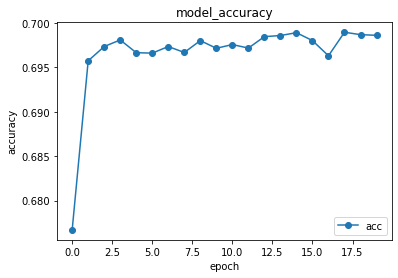

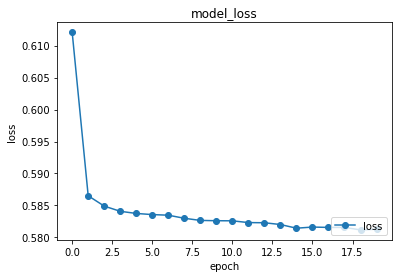

In [ ]:
plot_history(history)

In [ ]:
y_pred = model.predict(x_test)
print(y_pred[0])

[0.3608383]


In [ ]:
#予測値を二値に変換する関数
def toBinary(x):
    if x >= 0.50:
        x = 1
    else:
        x = 0
    return x

In [ ]:
y_pred = np.apply_along_axis(lambda x: toBinary(x), 1, y_pred)

### 各評価指標による評価（適合率，再現率，F1スコア，混同行列）

In [ ]:
#混同行列を見てみる
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(confusion_matrix)
print("Precision:", precision)
print("Recall", recall)
print("F1Score", f1)
confusion_matrix(y_test, y_pred)

<function confusion_matrix at 0x7f84cb3eb430>
Precision: 0.6785603475023271
Recall 0.57529922399053
F1Score 0.6226777706598334


array([[7656, 2072],
       [3229, 4374]])

### 学習済みモデルを保存

In [ ]:
#学習モデルを保存
model.save("pred_top3")

INFO:tensorflow:Assets written to: pred_top3\assets
